In [110]:
# Import Pandas package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
# import warnings

Read CSV File

In [111]:
origin = pd.read_csv('../archive/steam.csv')

In [112]:
# Check for null in the dataframe
origin.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [113]:
# copy the main dataframe to keep as backup
game = origin.copy() 

In [114]:
class crawler:
    def __init__ (self, year=False, genres=False):        
        if year and genres:
            if type(year) != str:
                self.year = str(year)
            else:
                self.year = year
            try:
                self.genres = genres.capitalize() # capitalize
            except:
                print("Please Enter genres in string")
                return
        
            print("Crawler Created", self.year, self.genres)
            print("use .showList to display list of data")
            print("use .getTopRating to display list of data and graph")
            print("use .getTopRatingDetails to display rating details for top number")
        else:
            print("Please enter genres and year of choice!")
    
    # Filter the data based on provided genre, year and no of top listed row 
    def showList(self, row=10):
        game = origin.copy()
        game = game[(game['genres'].str.contains(self.genres) & (game['price'] > 0))]
        
        # Filter the data based on release date(yeear) and average playtime
        game = game[pd.DatetimeIndex(game['release_date']).year == np.int64(self.year)]
        
        # get the difference ratings from the dataframe
        game['difference_ratings'] = game['positive_ratings'] - game['negative_ratings']
        
        # Filter data from negative return from difference ratings
        game = game[game['difference_ratings'] > 0].sort_values(by='difference_ratings', ascending=False).reset_index()
        self.game = game
        display(self.game[['name', 'release_date', 'developer', 'categories', 'genres', 'positive_ratings', 'negative_ratings','difference_ratings']].head(row))
    
    def getTopRating(self, row=10):
        self.showList(row)
        # plot data 
        plt.barh(y=self.game['name'].head(row), width=self.game['difference_ratings'].head(row))
        plt.xlabel("Difference Ratings")
        plt.ylabel("Game Names")
        
    def getTopRatingDetails(self, row=10):
        self.showList(row)
        dataLabels = ['positive', 'negative']
        myexplode = [0.2, 0]
        color = ['#99ff99', '#ff9999']
        sRow = 1
        pPlot= 1
        for i in range(row):
            if i%2 == 0 :
                plt.figure(int(i/2))
                pPlot = 1
            # Run just once!
            if i == 0:
                # Create Title
                plt.suptitle("RATING PERCENTAGE")
            # Get Column location
            pCol = self.game.columns.get_loc('positive_ratings')
            nCol = self.game.columns.get_loc('negative_ratings')
            # save the column data into data as list
            data = ([self.game.iloc[i,pCol], self.game.iloc[i,nCol]])
            # Plot pie Chart
            plt.subplot(sRow,2,pPlot)
            plt.pie(data, colors=color, explode=myexplode, autopct='%.1f%%');
            rName =self.game.iloc[i,self.game.columns.get_loc('name')]
            plt.title(rName)
            pPlot+=1
            plt.legend(dataLabels)
                
#         plt.tight_layout() # to adjust padding
        plt.show()
            
        

In [115]:
# Start
info = crawler(genres="indie", year="2017")

Crawler Created 2017 Indie
use .showList to display list of data
use .getTopRating to display list of data and graph
use .getTopRatingDetails to display rating details for top number


,name,release_date,developer,categories,genres,positive_ratings,negative_ratings,difference_ratings
0,ARK: Survival Evolved,2017-08-27,Studio Wildcard;Instinct Games;Efecto Studios;...,Single-player;Multi-player;MMO;Co-op;Steam Ach...,Action;Adventure;Indie;Massively Multiplayer;RPG,145035,66603,78432
1,The Long Dark,2017-08-01,Hinterland Studio Inc.,Single-player;Steam Achievements;Full controll...,Adventure;Indie;Simulation;Strategy,45856,4298,41558
2,Hollow Knight,2017-02-24,Team Cherry,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie,40167,1927,38240
3,Cuphead,2017-09-29,Studio MDHR Entertainment Inc.,Single-player;Local Co-op;Shared/Split Screen;...,Action;Indie,38821,1698,37123
4,Slime Rancher,2017-08-01,Monomi Park,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie;Simulation,24205,965,23240


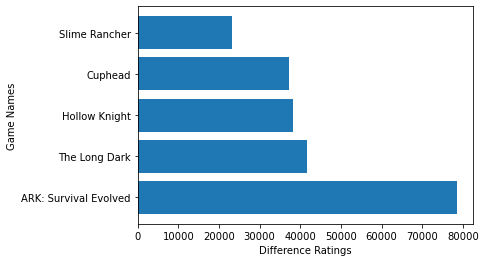

In [116]:
# Show first top 5 Data from the dataframe and display bar graph 
info.getTopRating(5)

In [117]:
# info.showList(5)

,name,release_date,developer,categories,genres,positive_ratings,negative_ratings,difference_ratings
0,ARK: Survival Evolved,2017-08-27,Studio Wildcard;Instinct Games;Efecto Studios;...,Single-player;Multi-player;MMO;Co-op;Steam Ach...,Action;Adventure;Indie;Massively Multiplayer;RPG,145035,66603,78432
1,The Long Dark,2017-08-01,Hinterland Studio Inc.,Single-player;Steam Achievements;Full controll...,Adventure;Indie;Simulation;Strategy,45856,4298,41558
2,Hollow Knight,2017-02-24,Team Cherry,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie,40167,1927,38240
3,Cuphead,2017-09-29,Studio MDHR Entertainment Inc.,Single-player;Local Co-op;Shared/Split Screen;...,Action;Indie,38821,1698,37123
4,Slime Rancher,2017-08-01,Monomi Park,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie;Simulation,24205,965,23240


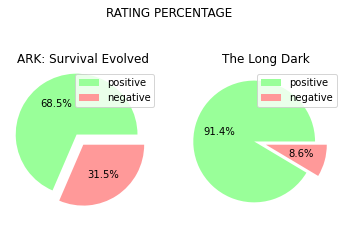

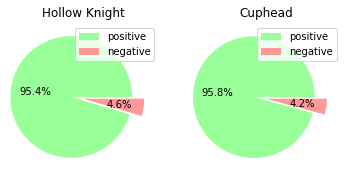

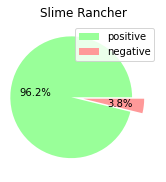

In [118]:
info.getTopRatingDetails(5)

In [119]:
origin.shape

(27075, 18)